In [2]:
#Implementation of RNN(LSTM) Deep Learning for monthly time series data
# from Januar 2010 to march 2022

In [3]:
# neural network approach to time series forecasting using extreme learning machines.

In [25]:
# import libraries
import tensorflow as tf
print(tf.__version__)
from sklearn import datasets
from sklearn import preprocessing
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot
from statsmodels.tsa.stattools import kpss, adfuller
from statsmodels.tsa.seasonal import STL

from statsmodels.tsa.seasonal import seasonal_decompose

from pylab import rcParams
from platform import python_version
import pandas as pd
from pandas import datetime

2.8.0


<ipython-input-25-67ebe460149d>:22: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [33]:
# df = pd.read_csv("Monthly_Timeseries.csv", index_col='Month', parse_dates=True)
# df.index.freq = 'MS'

def parser(x):
    return datetime.strptime(x,"%Y-%m-%d")
data = pd.read_csv('Monthly_Timeseries.csv', header = 0, parse_dates=[0],index_col=0,squeeze=True, date_parser=parser)
data

Month
2010-01-01    2624
2010-02-01    2336
2010-03-01    2432
2010-04-01    2126
2010-05-01    2095
              ... 
2021-11-01    2757
2021-12-01    2871
2022-01-01    2821
2022-02-01    2680
2022-03-01    2820
Name: EG_(GWh), Length: 147, dtype: int64

In [34]:
data.isnull().sum()

0

In [28]:
# print(df.head(5),"\n")
# print(df.tail(5),"\n")

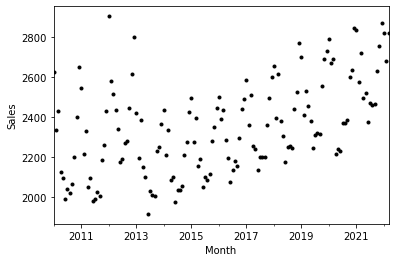

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
data = data.astype(float)
data
data.plot(style='k.',ylabel='Sales')
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error
import math
import numpy as np
from scipy.linalg import pinv2
data = np.array(data)
data = np.reshape(data, (-1, 1))
data

array([[2624.],
       [2336.],
       [2432.],
       [2126.],
       [2095.],
       [1990.],
       [2041.],
       [2023.],
       [2069.],
       [2201.],
       [2399.],
       [2653.],
       [2545.],
       [2214.],
       [2331.],
       [2050.],
       [2096.],
       [1983.],
       [1992.],
       [2028.],
       [2009.],
       [2187.],
       [2260.],
       [2433.],
       [2905.],
       [2580.],
       [2515.],
       [2436.],
       [2341.],
       [2174.],
       [2191.],
       [2272.],
       [2280.],
       [2447.],
       [2615.],
       [2802.],
       [2423.],
       [2194.],
       [2386.],
       [2153.],
       [2104.],
       [1917.],
       [2032.],
       [2010.],
       [2006.],
       [2229.],
       [2250.],
       [2368.],
       [2438.],
       [2212.],
       [2336.],
       [2086.],
       [2104.],
       [1975.],
       [2038.],
       [2036.],
       [2057.],
       [2212.],
       [2276.],
       [2424.],
       [2498.],
       [2277.],
       [

In [35]:
# df.isnull().sum()

In [39]:
m = 12
per = (111 - m)/147
size = int(len(data) * per)
d_train, d_test = data[0:size], data[size:len(data)]
mean_train = np.mean(d_train)
sd_train = np.std(d_train)
d_train = (d_train-mean_train)/sd_train
d_test = (d_test-mean_train)/sd_train

In [40]:
# from statsmodels.tsa.seasonal import seasonal_decompose

In [41]:
# results = seasonal_decompose(df['EG_(GWh)'])
# results.plot();

In [43]:
# X_train = np.array([d_train[i][0] for i in range(m)])
# y_train = np.array(d_train[m][0])
# for i in range(1,(d_train.shape[0]-m)):
#     l = np.array([d_train[j][0] for j in range(i,i+m)])
#     X_train = np.vstack([X_train,l])
#     y_train = np.vstack([y_train,d_train[i+m]])
# X_test = np.array([d_test[i][0] for i in range(m)])
# y_test = np.array(d_test[m][0])
# for i in range(1,(d_test.shape[0]-m)):
#     l = np.array([d_test[j][0] for j in range(i,i+m)])
#     X_test = np.vstack([X_test,l])
#     y_test = np.vstack([y_test,d_test[i+m]])
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

In [13]:
from sklearn.metrics import mean_squared_error
import math
import numpy as np
from scipy.linalg import pinv2
df = np.array(df)
df = np.reshape(df, (-1, 1))
df

array([[2624.],
       [2336.],
       [2432.],
       [2126.],
       [2095.],
       [1990.],
       [2041.],
       [2023.],
       [2069.],
       [2201.],
       [2399.],
       [2653.],
       [2545.],
       [2214.],
       [2331.],
       [2050.],
       [2096.],
       [1983.],
       [1992.],
       [2028.],
       [2009.],
       [2187.],
       [2260.],
       [2433.],
       [2905.],
       [2580.],
       [2515.],
       [2436.],
       [2341.],
       [2174.],
       [2191.],
       [2272.],
       [2280.],
       [2447.],
       [2615.],
       [2802.],
       [2423.],
       [2194.],
       [2386.],
       [2153.],
       [2104.],
       [1917.],
       [2032.],
       [2010.],
       [2006.],
       [2229.],
       [2250.],
       [2368.],
       [2438.],
       [2212.],
       [2336.],
       [2086.],
       [2104.],
       [1975.],
       [2038.],
       [2036.],
       [2057.],
       [2212.],
       [2276.],
       [2424.],
       [2498.],
       [2277.],
       [

In [14]:
len(df)

147

In [20]:
m = 12 #lag size

train_per = 135
test_per = 12

d_train = df[: 135]
d_test = df[135 : ]

mean_train = np.mean(d_train)
sd_train = np.std(d_train)

d_train = (d_train-mean_train) / sd_train
d_test = (d_test-mean_train) / sd_train

In [21]:
len(d_train)

135

In [22]:
len(d_test)

12

In [44]:
# X_train = np.array([d_train[i][0] for i in range(m)])
# y_train = np.array(d_train[m][0])

# for i in range(1,(d_train.shape[0]-m)):
#     l = np.array([d_train[j][0] for j in range(i,i+m)])
#     X_train = np.vstack([X_train,l])
#     y_train = np.vstack([y_train,d_train[i+m]])
    
# X_test = np.array([d_test[i][0] for i in range(m)])
# y_test = np.array(d_test[m][0])

# for i in range(1,(d_test.shape[0]-m)):
#     l = np.array([d_test[j][0] for j in range(i,i+m)])
#     X_test = np.vstack([X_test,l])
#     y_test = np.vstack([y_test,d_test[i+m]])
    
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)



# we are feeding 12 months data to predict next month prediction

In [99]:
import scipy.stats as stats
input_size = X_train.shape[1]
hidden_size = 100   #no. of hidden neurons
mu, sigma = 0, 1
w_lo = -1 
w_hi = 1
b_lo = -1 
b_hi = 1
#initialising input weights and biases randomly drawn from a truncated normal distribution
input_weights = stats.truncnorm.rvs((w_lo - mu) / sigma, (w_hi - mu) / sigma, loc=mu, scale=sigma,size=[input_size,hidden_size])
biases = stats.truncnorm.rvs((b_lo - mu) / sigma, (b_hi - mu) / sigma, loc=mu, scale=sigma,size=[hidden_size])

def relu(x):      #hidden layer activation function
    return np.maximum(x, 0, x)

In [100]:
def hidden_nodes(X):
    G = np.dot(X, input_weights)
    G = G + biases
    H = relu(G)
    return H
output_weights = np.dot(pinv2(hidden_nodes(X_train)), y_train)
def predict(X):
    out = hidden_nodes(X)
    out = np.dot(out, output_weights)
    return out
prediction = predict(X_test)

In [101]:
correct = 0
total = X_test.shape[0]
y_test = (y_test*sd_train) + mean_train
prediction = (prediction*sd_train) + mean_train

# evaluate forecasts
rmse = math.sqrt(mean_squared_error(y_test, prediction))
print('Test RMSE: %.3f' % rmse)

mape_sum = 0

for i,j in zip(y_test,prediction):
    mape_sum = mape_sum + (abs((i-j)/i))
mape = (mape_sum/total)*100
mpe_sum = 0

for i,j in zip(y_test,prediction):
    mpe_sum = mpe_sum + ((i-j)/i)
mpe = (mpe_sum/total)*100

print('Test MAPE: %.3f' % mape)
print('Test MPE: %.3f' % mpe)

Test RMSE: 129209749.285
Test MAPE: 99.998
Test MPE: 99.998


(array([-2.0e+07,  0.0e+00,  2.0e+07,  4.0e+07,  6.0e+07,  8.0e+07,
         1.0e+08,  1.2e+08,  1.4e+08]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

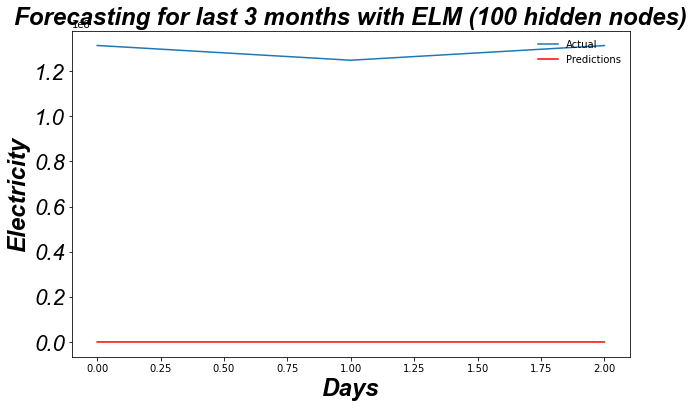

In [105]:
# plot forecasts against actual outcomes
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(y_test, label = 'Actual')
ax.plot(prediction, color='red',label = 'Predictions')
ax.legend(loc='upper right', frameon=False)
plt.xlabel('Days',fontname="Arial", fontsize=24, style='italic', fontweight='bold')
plt.ylabel('Electricity',fontname="Arial", fontsize=24, style='italic', fontweight='bold')

plt.title('Forecasting for last 3 months with ELM (100 hidden nodes)',fontname="Arial", fontsize=24, style='italic', fontweight='bold')
# plt.xticks([0,20,40,60,80],['2021-11-01','2021-12-01','2022-01-01', '2022-02-01', '2022-03-01'],fontname="Arial", fontsize = 20, style='italic')

plt.yticks(fontname="Arial", fontsize = 22, style='italic')


In [58]:
# https://www.analyticsvidhya.com/blog/2021/12/time-series-forecasting-with-extreme-learning-machines/